In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('data/Aviation_Data.csv')

/Users/ramsesnestor/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#drop columns with more than 10% missing data including Aircraft.Category because we have other columns 

df = df.drop(['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight'], axis=1)
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [5]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [6]:
df['year'] = df['Event.Date'].dt.year

In [7]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Injury.Severity         87889 non-null  object        
 7   Aircraft.damage         85695 non-null  object        
 8   Registration.Number     87572 non-null  object        
 9   Make                    88826 non-null  object        
 10  Model                   88797 non-null  object        
 11  Amateur.Built           88787 non-null  object        
 12  Number.of.Engines       82805 non-null  float6

In [9]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,88889.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440,1999.206662
std,0.446510,5.485960,1.544084,2.235625,27.913634,11.888226
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000


In [10]:
#finding out how many rows have no data points at all (0 rows)
null_values = df.isnull()
all_null_values = null_values.all(axis=1)
selected_rows = df[all_null_values]
selected_rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,year


In [11]:
mode = df['Total.Fatal.Injuries'].mode(dropna=False)
mode

0    0.0
dtype: float64

In [12]:
mode = df['Total.Serious.Injuries'].mode(dropna=False)
mode

0    0.0
dtype: float64

In [13]:
mode = df['Total.Minor.Injuries'].mode(dropna=False)
mode

0    0.0
dtype: float64

In [14]:
mode = df['Total.Uninjured'].mode(dropna=False)
mode

0    0.0
dtype: float64

In [15]:
#replacing dot to space in column names
df = df.rename(columns=lambda x: x.replace('.', ' '))

In [16]:
#turning objects in Make to str
df['Make'] = np.where(pd.isnull(df['Make']), df['Make'], df['Make'].astype(str))

In [17]:
df['Make'] = df['Make'].str.capitalize()

In [18]:
#filling in missing data with 0 based on previous steps
df.fillna(value={'Total Fatal Injuries': 0, 'Total Serious Injuries': 0, 'Total Minor Injuries': 0, 'Total Uninjured': 0}, inplace=True)

In [19]:
df.drop(['Registration Number', 'Event Id', 'Investigation Type', 'Accident Number'], axis=1, inplace=True)

In [20]:
df.drop(df[df['Amateur Built'] == 'Yes'].index, inplace = True)

In [21]:
df

,Event Date,Location,Country,Injury Severity,Aircraft damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Report Status,Publication Date,year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948.0
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962.0
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause,26-02-2007,1974.0
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977.0
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022,2022.0
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022.0
90345,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,American champion aircraft,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022,2022.0
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022.0


In [22]:
df['Make'].value_counts()[0:68]

Cessna        27065
Piper         14826
Beech          5356
Boeing         2731
Bell           2703
              ...  
Ercoupe          88
Gulfstream       87
Raven            86
Pitts            84
Navion           79
Name: Make, Length: 68, dtype: int64

In [23]:
#drop the rows that contain makes with less than 1% of accidents of entire data set
df = df[~df['Make'].isin(df['Make'].value_counts()[df['Make'].value_counts() < 84].index)]


In [24]:
df['year'] = df['year'].astype('Int64')

<ipython-input-24-5800715f0d57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('Int64')


In [25]:
df = df.rename(columns=str.capitalize)

In [26]:
df

,Event date,Location,Country,Injury severity,Aircraft damage,Make,Model,Amateur built,Number of engines,Engine type,Purpose of flight,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Weather condition,Report status,Publication date,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause,26-02-2007,1974
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,2022-12-22,"Brasnorte,",Brazil,Fatal,NaN,Air tractor,AT502,No,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,28-12-2022,2022
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022,2022
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022


In [27]:
df['Model'].value_counts()

152               2362
172               1748
172N              1159
PA-28-140          925
150                828
                  ... 
180-2                1
35 C33               1
H391                 1
Gulfstream III       1
H13G                 1
Name: Model, Length: 5828, dtype: int64

In [28]:
df['Make'].value_counts()

Cessna            27065
Piper             14826
Beech              5356
Boeing             2731
Bell               2703
                  ...  
Wsk pzl mielec       88
Ercoupe              88
Gulfstream           87
Raven                86
Pitts                84
Name: Make, Length: 67, dtype: int64

In [29]:
#df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '172')]

In [30]:
df_with_nan = df[df.isna().any(axis=1)]
df_with_nan

,Event date,Location,Country,Injury severity,Aircraft damage,Make,Model,Amateur built,Number of engines,Engine type,Purpose of flight,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Weather condition,Report status,Publication date,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,1979
5,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell douglas,DC9,No,2.0,Turbo Fan,NaN,0.0,0.0,1.0,44.0,VMC,Probable Cause,19-09-2017,1979
36,1982-01-04,SAINT CROIX,NaN,Fatal(1),Destroyed,Cessna,206,No,1.0,Reciprocating,Business,1.0,0.0,1.0,0.0,VMC,Probable Cause,04-01-1983,1982
79,1982-01-12,"CHICAGO, IL",United States,Incident,NaN,Lockheed,L-1011,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,149.0,UNK,Probable Cause,12-01-1983,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,2022-12-22,"Brasnorte,",Brazil,Fatal,NaN,Air tractor,AT502,No,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,28-12-2022,2022
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022,2022
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022


In [31]:
df.dropna(subset=['Make'], inplace=True)

In [32]:
df.describe()

,Number of engines,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Year
count,67497.000000,72242.000000,72242.000000,72242.000000,72242.000000,72242.000000
mean,1.162363,0.584521,0.237507,0.314775,5.637302,1998.222834
std,0.456078,5.445414,1.528995,1.773977,29.340985,11.710629
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2007.000000
max,4.000000,349.000000,161.000000,200.000000,699.000000,2022.000000


In [33]:
df['Number of engines'].mode()

0    1.0
dtype: float64

In [34]:
df['Number of engines'].fillna(1, inplace=True)

In [35]:
df.isna().sum()

Event date                    0
Location                     48
Country                     192
Injury severity             849
Aircraft damage            2617
Make                          0
Model                        23
Amateur built                89
Number of engines             0
Engine type                5319
Purpose of flight          5160
Total fatal injuries          0
Total serious injuries        0
Total minor injuries          0
Total uninjured               0
Weather condition          3650
Report status              4910
Publication date          13034
Year                          0
dtype: int64

In [36]:
df['Location'].fillna('Unknown', inplace=True)

In [37]:
df['Country'].fillna('Unknown', inplace=True)

In [38]:
df['Injury severity'].fillna('Unknown', inplace=True)

In [39]:
df['Aircraft damage'].fillna('Unknown', inplace=True)

In [40]:
df['Model'].fillna('Unknown', inplace=True)

In [41]:
df['Engine type'].fillna('Unknown', inplace=True)

In [42]:
df['Purpose of flight'].fillna('Unknown', inplace=True)

In [43]:
df['Weather condition'].fillna('Unknown', inplace=True)

In [44]:
df['Report status'].fillna('Unknown', inplace=True)

In [45]:
df

,Event date,Location,Country,Injury severity,Aircraft damage,Make,Model,Amateur built,Number of engines,Engine type,Purpose of flight,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Weather condition,Report status,Publication date,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause,26-02-2007,1974
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,2022-12-22,"Brasnorte,",Brazil,Fatal,Unknown,Air tractor,AT502,No,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,Unknown,28-12-2022,2022
90343,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,Piper,PA-28-151,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,29-12-2022,2022
90344,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Bellanca,7ECA,No,1.0,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,NaN,2022
90346,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Cessna,210N,No,1.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,NaN,2022


In [46]:
df

,Event date,Location,Country,Injury severity,Aircraft damage,Make,Model,Amateur built,Number of engines,Engine type,Purpose of flight,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Weather condition,Report status,Publication date,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause,26-02-2007,1974
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,2022-12-22,"Brasnorte,",Brazil,Fatal,Unknown,Air tractor,AT502,No,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,Unknown,28-12-2022,2022
90343,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,Piper,PA-28-151,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,29-12-2022,2022
90344,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Bellanca,7ECA,No,1.0,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,NaN,2022
90346,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Cessna,210N,No,1.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,NaN,2022


Text(0.5, 1.0, 'Number of aircrafts based on top 20 makes')

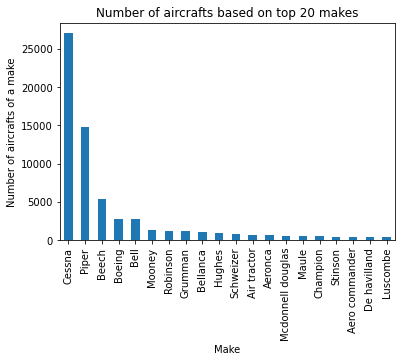

In [47]:
ax = df['Make'].value_counts().head(20).plot(kind='bar')
ax.set_xlabel('Make')
ax.set_ylabel('Number of aircrafts of a make')
ax.set_title('Number of aircrafts based on top 20 makes')

Text(0.5, 1.0, 'Number of aircrafts based on top 20 models')

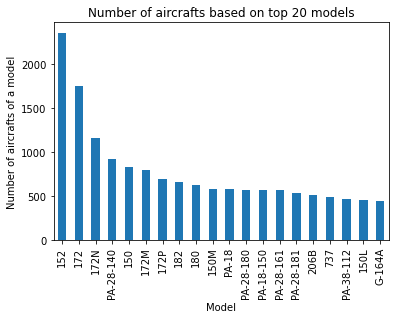

In [48]:
ax = df['Model'].value_counts().head(20).plot(kind='bar')
ax.set_xlabel('Model')
ax.set_ylabel('Number of aircrafts of a model')
ax.set_title('Number of aircrafts based on top 20 models')

In [49]:
# Calculate the total number of accidents for each make 
accidents_count = df.groupby(["Make"]).size().reset_index(name="total_accidents")
accidents_count

,Make,total_accidents
0,Aero commander,427
1,Aeronca,634
2,Aerospatiale,386
3,Aerostar,89
4,Air tractor,691
...,...,...
62,Swearingen,177
63,Taylorcraft,383
64,Waco,142
65,Weatherly,93


In [50]:
# Calculate the total number of injuries for each make 
injuries_count = df.groupby(["Make"])[["Total fatal injuries", "Total serious injuries", "Total minor injuries", 'Total uninjured']].sum().reset_index()
injuries_count

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured
0,Aero commander,241.0,89.0,92.0,486.0
1,Aeronca,116.0,155.0,167.0,570.0
2,Aerospatiale,344.0,146.0,208.0,2591.0
3,Aerostar,19.0,72.0,58.0,238.0
4,Air tractor,121.0,75.0,111.0,407.0
...,...,...,...,...,...
62,Swearingen,108.0,39.0,48.0,886.0
63,Taylorcraft,78.0,97.0,120.0,306.0
64,Waco,13.0,16.0,48.0,214.0
65,Weatherly,10.0,7.0,16.0,61.0


In [56]:
# Calculate the percentage of accidents resulting in injuries for each make 
injury_percentage = pd.merge(injuries_count, accidents_count, on=["Make"])
total_people = injuries_count['Total fatal injuries'] + injuries_count['Total serious injuries'] + injuries_count['Total minor injuries'] + injuries_count['Total uninjured']
injury_percentage["Fatal percentage"] = (injury_percentage["Total fatal injuries"] / total_people) * 100
injury_percentage["Serious percentage"] = (injury_percentage["Total serious injuries"] / total_people) * 100
injury_percentage["Minor percentage"] = (injury_percentage["Total minor injuries"] / total_people) * 100
injury_percentage["Uninjured percentage"] = (injury_percentage["Total uninjured"] / total_people) * 100
injury_percentage

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage
0,Aero commander,241.0,89.0,92.0,486.0,427,26.541850,9.801762,10.132159,53.524229
1,Aeronca,116.0,155.0,167.0,570.0,634,11.507937,15.376984,16.567460,56.547619
2,Aerospatiale,344.0,146.0,208.0,2591.0,386,10.459106,4.439039,6.324111,78.777744
3,Aerostar,19.0,72.0,58.0,238.0,89,4.909561,18.604651,14.987080,61.498708
4,Air tractor,121.0,75.0,111.0,407.0,691,16.946779,10.504202,15.546218,57.002801
...,...,...,...,...,...,...,...,...,...,...
62,Swearingen,108.0,39.0,48.0,886.0,177,9.990749,3.607771,4.440333,81.961147
63,Taylorcraft,78.0,97.0,120.0,306.0,383,12.978369,16.139767,19.966722,50.915141
64,Waco,13.0,16.0,48.0,214.0,142,4.467354,5.498282,16.494845,73.539519
65,Weatherly,10.0,7.0,16.0,61.0,93,10.638298,7.446809,17.021277,64.893617


In [58]:
injury_percentage["overall_injury_percentage"] = (injury_percentage["Total fatal injuries"] + injury_percentage["Total serious injuries"] + injury_percentage["Total minor injuries"]) / total_people * 100



In [119]:
# Filter the injury_percentage DataFrame to include only aircrafts with a significant number of accidents
significant_accidents = injury_percentage[injury_percentage["total_accidents"] >= 100]

# Sort the significant_accidents DataFrame by the lowest overall percentage
safest_overall_aircrafts = significant_accidents.sort_values("overall_injury_percentage").head(10)
safest_overall_aircrafts

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage,overall_injury_percentage
14,Boeing,8713.0,2151.0,2308.0,207243.0,2731,3.952998,0.975886,1.047116,94.024000,5.976000
44,Mcdonnell douglas,1279.0,556.0,1505.0,45012.0,604,2.645185,1.149901,3.112591,93.092323,6.907677
41,Lockheed,326.0,75.0,201.0,8019.0,122,3.781464,0.869969,2.331516,93.017051,6.982949
6,Airbus,1325.0,183.0,106.0,21261.0,290,5.792350,0.800000,0.463388,92.944262,7.055738
7,Airbus industrie,1174.0,138.0,399.0,20905.0,161,5.191015,0.610187,1.764238,92.434560,7.565440
24,Embraer,436.0,157.0,110.0,6400.0,238,6.138251,2.210334,1.548641,90.102773,9.897227
23,Douglas,963.0,105.0,247.0,8805.0,277,9.515810,1.037549,2.440711,87.005929,12.994071
62,Swearingen,108.0,39.0,48.0,886.0,177,9.990749,3.607771,4.440333,81.961147,18.038853
29,Fairchild,146.0,62.0,70.0,1120.0,161,10.443491,4.434907,5.007153,80.114449,19.885551
35,Helio,16.0,22.0,15.0,198.0,111,6.374502,8.764940,5.976096,78.884462,21.115538


In [104]:
safest_overall_aircrafts['Model'] = df['Model']

In [107]:
safest_overall_aircrafts.isna().sum()

Make                         0
Total fatal injuries         0
Total serious injuries       0
Total minor injuries         0
Total uninjured              0
total_accidents              0
Fatal percentage             0
Serious percentage           0
Minor percentage             0
Uninjured percentage         0
overall_injury_percentage    0
Date                         1
Model                        1
dtype: int64

In [112]:
df.loc[(df['Make'] == 'Boeing') & (df['Model'] == 'NaN')]

,Event date,Location,Country,Injury severity,Aircraft damage,Make,Model,Amateur built,Number of engines,Engine type,Purpose of flight,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Weather condition,Report status,Publication date,Year


In [105]:
safest_overall_aircrafts

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage,overall_injury_percentage,Date,Model
14,Boeing,8713.0,2151.0,2308.0,207243.0,2731,3.952998,0.975886,1.047116,94.024000,5.976000,<NA>,NaN
44,Mcdonnell douglas,1279.0,556.0,1505.0,45012.0,604,2.645185,1.149901,3.112591,93.092323,6.907677,1982,A185F
41,Lockheed,326.0,75.0,201.0,8019.0,122,3.781464,0.869969,2.331516,93.017051,6.982949,1982,PA-24-250
6,Airbus,1325.0,183.0,106.0,21261.0,290,5.792350,0.800000,0.463388,92.944262,7.055738,1981,180
7,Airbus industrie,1174.0,138.0,399.0,20905.0,161,5.191015,0.610187,1.764238,92.434560,7.565440,1982,140
24,Embraer,436.0,157.0,110.0,6400.0,238,6.138251,2.210334,1.548641,90.102773,9.897227,1982,AA-5B
23,Douglas,963.0,105.0,247.0,8805.0,277,9.515810,1.037549,2.440711,87.005929,12.994071,1982,PA-24-180
62,Swearingen,108.0,39.0,48.0,886.0,177,9.990749,3.607771,4.440333,81.961147,18.038853,1982,ASW 20
29,Fairchild,146.0,62.0,70.0,1120.0,161,10.443491,4.434907,5.007153,80.114449,19.885551,1982,7GCBC
35,Helio,16.0,22.0,15.0,198.0,111,6.374502,8.764940,5.976096,78.884462,21.115538,1982,PA-28R-200


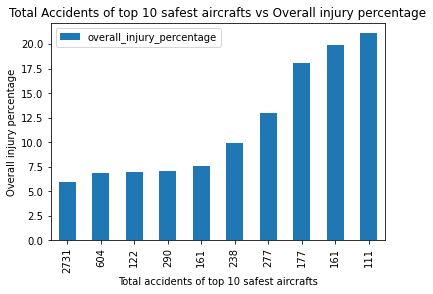

In [122]:
safest_overall_aircrafts.plot.bar(x='total_accidents', y='overall_injury_percentage')
plt.xlabel('Total accidents of top 10 safest aircrafts')
plt.ylabel('Overall injury percentage')
plt.title('Total Accidents of top 10 safest aircrafts vs Overall injury percentage')
plt.show()

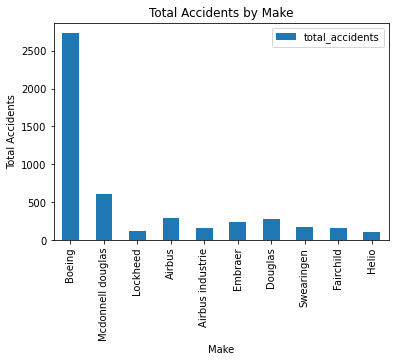

In [69]:
safest_overall_aircrafts.plot.bar(x='Make', y='total_accidents')
plt.xlabel('Make')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Make')
plt.show()

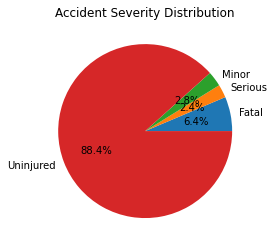

In [70]:
labels = ['Fatal', 'Serious', 'Minor', 'Uninjured']
sizes = [safest_overall_aircrafts['Fatal percentage'].mean(), safest_overall_aircrafts['Serious percentage'].mean(), safest_overall_aircrafts['Minor percentage'].mean(), safest_overall_aircrafts['Uninjured percentage'].mean()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Accident Severity Distribution')
plt.show()

In [72]:
df

,Event date,Location,Country,Injury severity,Aircraft damage,Make,Model,Amateur built,Number of engines,Engine type,Purpose of flight,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Weather condition,Report status,Publication date,Year
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,1948
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,1962
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause,26-02-2007,1974
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,1977
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,16-04-1980,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,2022-12-22,"Brasnorte,",Brazil,Fatal,Unknown,Air tractor,AT502,No,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,Unknown,28-12-2022,2022
90343,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,Piper,PA-28-151,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,29-12-2022,2022
90344,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Bellanca,7ECA,No,1.0,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,NaN,2022
90346,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Cessna,210N,No,1.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,NaN,2022


In [73]:
safest_overall_aircrafts['Date'] = df['Year']

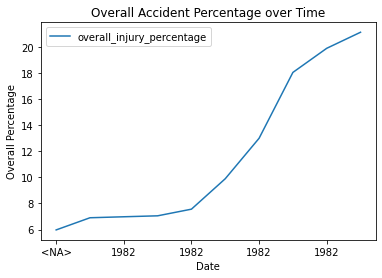

In [76]:
safest_overall_aircrafts.plot.line(x='Date', y='overall_injury_percentage')
plt.xlabel('Date')
plt.ylabel('Overall Percentage')
plt.title('Overall Accident Percentage over Time')
plt.show()

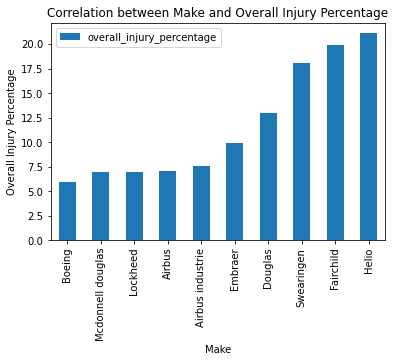

In [100]:
safest_overall_aircrafts.plot.bar(x='Make', y='overall_injury_percentage')
plt.xlabel('Make')
plt.ylabel('Overall Injury Percentage')
plt.title('Correlation between Make and Overall Injury Percentage')
plt.show()

In [113]:
safest_overall_aircrafts['Weather conditions'] = df['Weather condition']

In [115]:
safest_overall_aircrafts['Model'] = df['Model']

In [116]:
safest_overall_aircrafts

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage,overall_injury_percentage,Date,Model,Weather conditions
14,Boeing,8713.0,2151.0,2308.0,207243.0,2731,3.952998,0.975886,1.047116,94.024000,5.976000,<NA>,NaN,NaN
44,Mcdonnell douglas,1279.0,556.0,1505.0,45012.0,604,2.645185,1.149901,3.112591,93.092323,6.907677,1982,A185F,VMC
41,Lockheed,326.0,75.0,201.0,8019.0,122,3.781464,0.869969,2.331516,93.017051,6.982949,1982,PA-24-250,VMC
6,Airbus,1325.0,183.0,106.0,21261.0,290,5.792350,0.800000,0.463388,92.944262,7.055738,1981,180,IMC
7,Airbus industrie,1174.0,138.0,399.0,20905.0,161,5.191015,0.610187,1.764238,92.434560,7.565440,1982,140,VMC
24,Embraer,436.0,157.0,110.0,6400.0,238,6.138251,2.210334,1.548641,90.102773,9.897227,1982,AA-5B,IMC
23,Douglas,963.0,105.0,247.0,8805.0,277,9.515810,1.037549,2.440711,87.005929,12.994071,1982,PA-24-180,VMC
62,Swearingen,108.0,39.0,48.0,886.0,177,9.990749,3.607771,4.440333,81.961147,18.038853,1982,ASW 20,VMC
29,Fairchild,146.0,62.0,70.0,1120.0,161,10.443491,4.434907,5.007153,80.114449,19.885551,1982,7GCBC,VMC
35,Helio,16.0,22.0,15.0,198.0,111,6.374502,8.764940,5.976096,78.884462,21.115538,1982,PA-28R-200,VMC
